# Cross-Validation

## Understanding overfitting using `red wine quality dataset`

In [33]:
import pandas as pd 
df_wine = pd.read_csv("winequality-red.csv")
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [34]:
df_wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [35]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5    
}

# you can use the map function of pandas with any dictionary 
# to convert the values in a given column to values in the dictionary

df_wine.loc[:, 'quality'] = df_wine.quality.map(quality_mapping)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [36]:
df_wine.quality.unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [37]:
len(df_wine)

1599

#### We will divide this data into two parts: 1000 samples for training and 59 as a separate set

In [38]:
# Splitting the data

# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after shuffling the dataframe

df_wine = df_wine.sample(frac=1).reset_index(drop=True)

# select top 1000 rows for training
df_train_wine = df_wine.head(1000)


# select bottom 599 values for testing/validation
df_test_wine = df_wine.tail(599)

In [39]:
len(df_train_wine)

1000

In [40]:
len(df_test_wine)

599

In [41]:
df_train_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.3,0.31,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,4
1,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,2
2,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,5
3,8.8,0.55,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,3
4,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,4


In [42]:
df_test_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1000,6.0,0.50,0.04,2.2,0.092,13.0,26.0,0.99647,3.46,0.47,10.0,2
1001,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,2
1002,6.7,0.48,0.08,2.1,0.064,18.0,34.0,0.99552,3.33,0.64,9.7,2
1003,8.0,0.62,0.35,2.8,0.086,28.0,52.0,0.99700,3.31,0.62,10.8,2
1004,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,3


#### We will now train a decision tree model on the training set.

In [43]:
# import from scikit learn
from sklearn import tree
from sklearn import metrics


# initialize decision tree classifier class with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)


# choose the columns you want to train on 
# these are the features for the model
cols = ['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']


# train the model on the provided features and mapped quality from before
clf.fit(df_train_wine[cols], df_train_wine.quality)

DecisionTreeClassifier(max_depth=3)

In [44]:
# generate predictions on the training set
train_predictions = clf.predict(df_train_wine[cols])


# generate predictions on the test set
test_predictions = clf.predict(df_test_wine[cols])

# calculate accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train_wine.quality, train_predictions)
print(f"Train Accuracy: {train_accuracy}")


# calculate accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test_wine.quality, test_predictions)
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.619
Test Accuracy: 0.5893155258764607


#### Now, we increase the max_depth to 7 and repeat the process

In [45]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(df_train_wine[cols], df_train_wine.quality)

# generate predictions on the training set
train_predictions = clf.predict(df_train_wine[cols])


# generate predictions on the test set
test_predictions = clf.predict(df_test_wine[cols])

# calculate accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train_wine.quality, train_predictions)
print(f"Train Accuracy: {train_accuracy}")


# calculate accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test_wine.quality, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8
Test Accuracy: 0.6026711185308848


#### We calculate these accuracies for different values of max_depth and make a plot

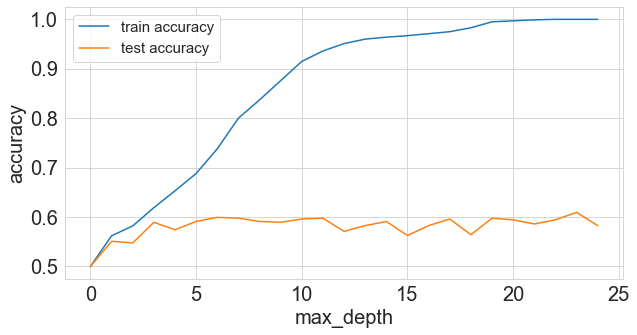

In [46]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics

# import matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

# this is our global size of label text on the plots (rc=runtime configuration)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# this line ensures that the plot is displayed inside the notebook
%matplotlib inline

# initialize lists to store accuracies for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # initialize the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # columns/features for training (this can also be done outside the for loop)
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]
    
    # fit the model on given features
    clf.fit(df_train_wine[cols], df_train_wine.quality)

    # create training and test predictions
    train_predictions = clf.predict(df_train_wine[cols])
    test_predictions = clf.predict(df_test_wine[cols])

    # calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train_wine.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test_wine.quality, test_predictions)

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# create two plots using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## K-fold Cross Validation

#### Here, we split the data into k equal folds and assign a value from 0 to k-1 to each sample

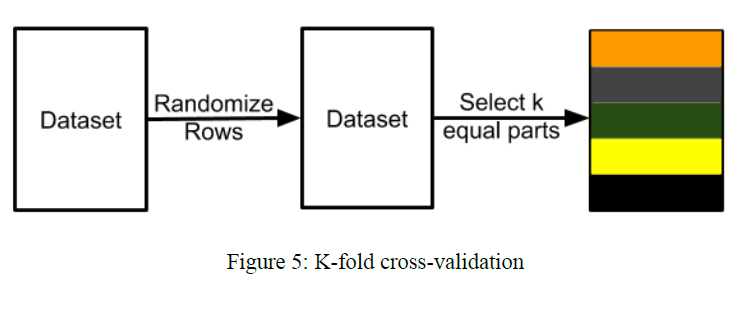

In [47]:
# import pandas and model_selection module of scikit-learn
import pandas as pd 
from sklearn import model_selection

if __name__ == "__main__":
    # Training data is in a CSV file called train.csv
    df = pd.read_csv("train.csv")
    
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop = True)
    
    # initialize the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    
    # fill the new kfold column
    for fold, (trn_, val_)in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
        
    # save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)

In [48]:
df.sample(10)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
236996,484933,B,B,A,A,B,D,A,E,C,...,0.482509,0.835795,0.851300,0.492138,0.701444,0.528468,0.460573,0.245750,7.026747,3
263506,360711,A,B,A,C,B,B,A,E,E,...,0.439721,0.364435,0.507490,0.302187,0.289297,0.379915,0.172742,0.344752,9.105938,4
22128,240291,B,B,A,C,B,B,A,E,C,...,0.387993,0.386251,1.039561,0.235324,0.689297,0.303417,0.764264,0.819134,7.074311,0
207029,321398,B,A,A,C,B,B,A,E,A,...,0.432964,0.821634,0.992861,0.846685,0.689101,0.672493,0.605552,0.620126,9.652955,3
207004,479668,A,A,B,A,B,D,A,E,C,...,0.850333,0.384525,0.344141,0.127435,0.742744,0.332725,0.170127,0.275063,7.320552,3
7686,138333,A,A,A,C,B,D,A,E,C,...,0.569618,0.372647,0.599276,0.594695,0.693728,0.434882,0.742937,0.623418,9.180686,0
186489,318676,A,A,A,C,B,D,A,E,E,...,0.425522,0.840786,0.314257,0.832428,0.725494,0.795994,0.945788,0.590052,7.603043,3
154604,492240,A,B,B,C,B,B,A,E,C,...,0.394877,0.481327,0.259455,0.190066,0.234790,0.435290,0.317506,0.152017,8.801175,2
242790,212380,A,A,A,C,B,B,A,E,E,...,0.269897,0.527692,0.385285,0.328619,0.260424,0.434395,0.173045,0.462204,8.766938,4
185161,433850,A,A,A,C,B,D,A,E,A,...,0.379969,0.249750,0.505598,0.842438,0.511438,1.002542,0.665436,0.405740,7.442640,3


## Stratified K-fold Cross Validation

#### This technique keeps the ratio of labels in each fold constant.

In [51]:
# import pandas and model_selection module of scikit-learn
import pandas as pd 
from sklearn import model_selection

if __name__ == "__main__":
    # Training data is in a CSV file called train.csv
    df_leads = pd.read_csv("Leads.csv")
    
    # we create a new column called kfold and fill it with -1
    df_leads["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    df_leads = df_leads.sample(frac=1).reset_index(drop = True)
    
    #fetch targets
    y = df_leads.Converted.values
    
    # initialize the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    for f, (t, v)in enumerate(kf.split(X=df_leads, y=y)):
        df_leads.loc[v, 'kfold'] = f
        
    # save the new csv with kfold column
    df_leads.to_csv("leads_train_folds.csv", index=False)

In [52]:
df_leads.sample(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,kfold
8456,2674f154-c494-4d87-b0a5-8b791d907cfd,590918,API,Google,No,No,0,2.0,275,2.0,...,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,SMS Sent,4
4939,34b1eb30-5b35-4461-a444-105d31e6209d,601573,API,Olark Chat,No,No,0,0.0,0,0.0,...,Select,Select,NaN,NaN,NaN,NaN,No,No,Email Opened,2
8309,3f1d6ef1-b6a7-4591-9a71-e4af32ca5e39,644069,API,Olark Chat,No,No,0,0.0,0,0.0,...,Other Leads,Select,02.Medium,02.Medium,15.0,14.0,No,No,Modified,4
8002,8f7c3712-d521-4b20-a713-47237c057e8b,603354,API,Olark Chat,No,No,0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Olark Chat Conversation,4
7986,7b831a46-4e22-4801-9b66-613da94d977a,604832,Landing Page Submission,Direct Traffic,No,No,0,2.0,154,2.0,...,NaN,Mumbai,NaN,NaN,NaN,NaN,No,Yes,Modified,4
249,c97b4042-6390-4662-9caf-5e58aa8c7083,615645,Landing Page Submission,Google,No,No,1,3.0,1010,3.0,...,NaN,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,No,SMS Sent,0
694,be27249b-9677-4397-8158-f795d95fbfd8,659217,Landing Page Submission,Google,Yes,No,0,4.0,323,4.0,...,NaN,Mumbai,02.Medium,01.High,13.0,18.0,No,No,Unsubscribed,0
5298,631f0564-9ca8-48a1-8280-250c4a189b9e,630597,Lead Add Form,Reference,No,No,0,NaN,278,NaN,...,Potential Lead,Thane & Outskirts,02.Medium,01.High,13.0,19.0,No,No,Modified,2
101,05a656b4-1cf4-4184-bfb1-b43d17014b53,608638,Landing Page Submission,Direct Traffic,Yes,No,0,6.0,330,3.0,...,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,No,No,Page Visited on Website,0
3365,1dfe1f39-98ce-484e-bd72-37efb03722a8,637909,Landing Page Submission,Google,No,No,1,4.0,701,4.0,...,Select,Other Cities of Maharashtra,02.Medium,01.High,15.0,17.0,No,No,SMS Sent,1


#### We take a look at the distribution of labels in the wine dataset

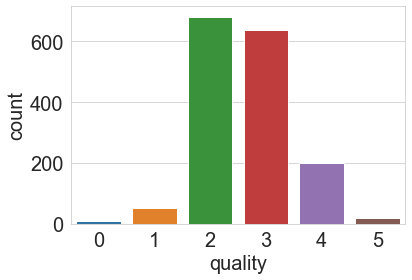

In [54]:
b = sns.countplot(x='quality', data=df_wine)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20);

#### Here, the quality is very much skewed. So, we choose stratified k-fold in this case. 

## Using Stratified K-fold for Regression problem

In [55]:
# stratified k-fold for regression
import numpy as np
import pandas as pd 

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1 
    
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    
    # calculate the number of bins by Sturge's Rule
    # here we take the floor of the value (another option is to just round it)
    num_bins =int(np.floor(1 + np.log2(len(data))))
    
    # bin targets
    data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)
    
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    # note that, instead of targets, we use bins !
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    
    # drop the bins column
    data = data.drop("bins", axis=1)
    
    # return dataframe with folds
    return data 

if __name__ == "__main__":
    # we create a sample dataset with 15000 samples and 100 features and 1 target
    X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)
    
    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
    df.loc[:, "target"] = y 
    
    # create folds
    df = create_folds(df)
    

In [58]:
df.sample(10)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
12664,0.754502,-0.717729,-1.111043,1.730941,0.856068,-1.637232,1.036993,0.958542,-0.295239,1.435526,...,-0.427886,-0.938058,1.845083,-2.195588,-0.481749,-0.025776,0.068315,-0.876436,-27.501338,4
4590,-0.321837,-0.159872,0.143012,0.215088,0.820942,-0.312116,-0.757583,1.639522,0.196060,1.164149,...,-1.761236,0.498078,0.266521,1.477379,0.316424,-0.023804,2.289173,-0.158622,-141.273104,1
1123,0.328587,-1.330489,0.292692,-0.463862,-0.822331,-0.825702,-0.090726,-0.267685,-0.417816,0.290486,...,-0.110458,0.141849,0.933018,-0.228855,-0.453734,0.731620,1.869385,-0.089184,324.085006,0
4538,-1.466937,-0.019798,0.011866,-0.110993,-0.079994,1.157877,1.075741,-1.478198,0.909874,-0.654287,...,0.505501,-1.035224,0.560942,0.468506,-0.035491,-0.774466,-1.745954,0.353082,194.633046,1
3577,0.954293,1.163348,-0.614397,0.801587,-1.311993,-0.485640,0.001022,0.085341,-2.414562,-1.089480,...,-1.301137,-0.249131,-0.067634,-0.824700,0.363220,-1.490853,0.640333,1.990499,12.001194,1
1206,-0.618129,-0.513981,-0.188962,-0.445888,1.754884,0.400832,-0.344136,-0.105628,-0.738498,0.405553,...,-1.263675,-0.666452,0.466409,-0.340569,0.085853,-0.458098,0.100093,-1.787305,-85.169823,0
6603,1.123981,-0.498572,-0.525927,0.744651,-0.194829,-0.117135,-0.537416,-1.453198,-0.707445,-0.318737,...,-0.889608,1.718143,-0.044545,-0.419163,1.272609,0.255037,-1.146228,-0.407722,-53.911032,2
2598,-1.331671,1.139915,-0.503968,-0.532338,-0.909724,-1.654562,1.240506,-0.178644,-0.102745,0.105144,...,-0.595770,-0.752923,-0.886660,-1.042205,0.996838,-0.833994,0.896049,-0.220981,-207.455966,0
11656,-0.775092,0.909691,-0.259690,-0.059030,0.835608,-0.490294,-0.033947,-0.743097,-1.002039,-0.130496,...,0.640819,-0.956712,1.872094,-2.619419,-1.176604,-1.077864,0.322938,-1.045860,22.426923,3
7632,1.844780,0.084196,-1.614948,1.222376,1.016820,0.656012,0.976949,0.794996,-1.216174,0.926312,...,0.075693,-0.315937,-0.415597,0.958043,1.019521,-0.053328,1.290254,-0.777235,-49.256065,2
